# Machine Learning Model for Heart Disease Classification

### CS 171 ML Project Code Runbook

#### Project Members:

Iris Feng

Alan Kashiwagi

Neeharika Kandikattu



---



Our notebook is very simple to run. All code blocks only need to be executed once, then the notebook and results will be ready to be viewed.




## Data

Our Heart Disease dataset was sourced from the UC Irvine Machine Learning Repository and contains data only from the Cleveland Clinic Foundation. Although the original data from the foundation contained 76 attributes, it was found that only 14 attributes contributed to detecting the presence of heart disease, so the dataset from UCI contains only those 14 attributes and over 300 rows.

After checking the correlation of all the features in the dataset, we used all of them in our model, including age, sex, resting blood pressure, cholesterol, fasting blood sugar, etc. The dependent variable we are using to show the presence of heart disease is “num.” “num” has a value of 0 for no disease and 1-4 for.

To clean the data, we dropped all instances that had missing values. Then as part of the Feature Engineering, for the diagnosis of heart disease, we binned the “num” attribute into a dichotomous variable, assigning 0 for no disease and 1 for the presence of heart disease. We kept the all features as continuous variables. We also binned several other attributes such as sex, age, chest pain type (cp), cholesterol (chol), and more in order to create data visualizations to help us study the relationship between these variables and num.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Extract Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/heart-disease.csv")
print(df)
print(df.shape)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  num  
0        3  0.0   6.0    0  
1        2  3.0   3.0    2  


In [ ]:
df1 = df.copy()
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


### Data Clean

In [ ]:
print(df1.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [ ]:
# drop all missing values
df1.dropna(inplace=True)
print(df1.isnull().sum())
print(df1.shape)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
(297, 14)


In [ ]:
print(df1.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object


In [ ]:
# convert all data type to integer
df1 = df1.astype({"oldpeak":'int', "ca":'int',"thal":'int'}) 
display(df1.dtypes)

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int64
slope       int64
ca          int64
thal        int64
num         int64
dtype: object

In [ ]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,0.777778,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.076991,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.000000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.000000,3.000000,3.000000,7.000000,4.000000


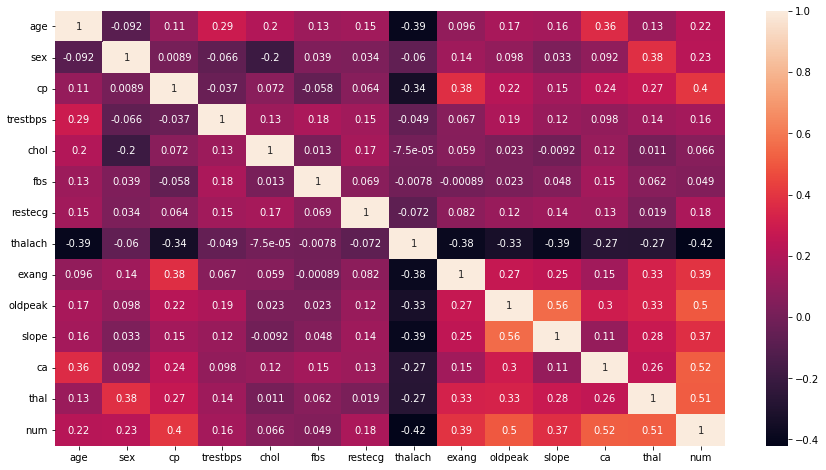

In [ ]:
# Checking Correlation using Heatmap 
x = df1.corr()
plt.figure(figsize = (15,8))
sns.heatmap(x,annot = True)

No two variables are strongly correlated, so we can use all the independent variable for model evaluation.

### Data Visualization and Feature Engineering

In [ ]:
# visualize the predicted attribute num
# which indicates the number of diagnosis of heart disease
df1['num'].value_counts()

0    160
1     54
2     35
3     35
4     13
Name: num, dtype: int64

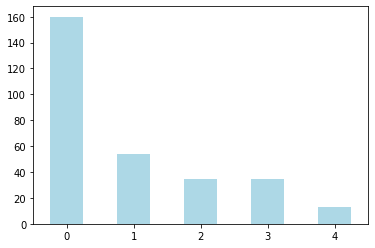

In [ ]:
# plot chart for the dependent variable
df1["num"].value_counts().plot(kind="bar", color=["lightblue"])
plt.xticks(rotation=360)
plt.show()

In [ ]:
# Categorize the dependent variable into two categories: 
# 0 as no heart disease, 1 as at least one kind of heart disease
df1['Heart_disease_category']=[0 if  num==0 else 1 for num in list(df1['num'].values) ]
print(df1['Heart_disease_category'].value_counts())


0    160
1    137
Name: Heart_disease_category, dtype: int64


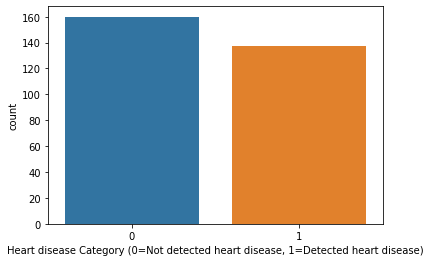

In [ ]:
# plot chart for denpendet variavle category
sns.countplot(x="Heart_disease_category", data=df1)
plt.xlabel("Heart disease Category (0=Not detected heart disease, 1=Detected heart disease)")
plt.show()

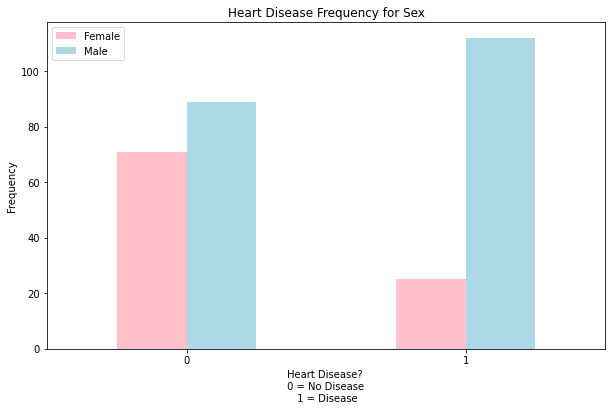

In [ ]:
# visualize heart Disease Frequency for Sex
pd.crosstab(df1.Heart_disease_category, df1.sex).plot(kind="bar",figsize=(10, 6),color=["pink", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Heart Disease? \n 0 = No Disease \n 1 = Disease")
plt.xticks(rotation=360)
plt.ylabel("Frequency")
plt.legend(["Female", "Male"])
plt.show()

In [ ]:
# Categorize independent variable age into three categories: 0 as young, 1 as middle, and 2 as old
df1['Age_lable']=['Young' if  29<=age<=45 else 'Middle' if 46<=age<=61 else 'Old' for age in list(df1['age'].values) ]
print(df1['Age_lable'].value_counts())


Middle    165
Old        71
Young      61
Name: Age_lable, dtype: int64


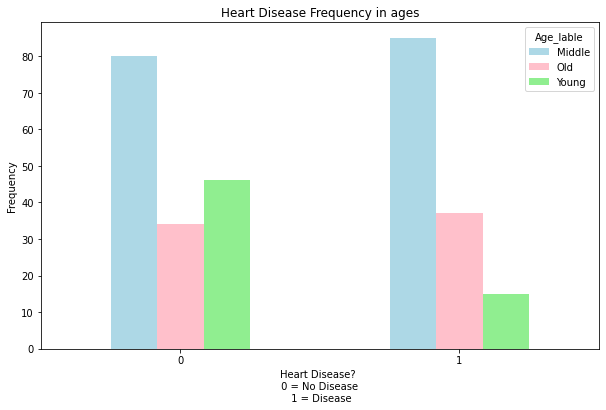

In [ ]:
# visualize heart Disease Frequency in different age
pd.crosstab(df1.Heart_disease_category, df1.Age_lable).plot(kind="bar",figsize=(10, 6),color=["lightblue", "pink", 'lightgreen'])
plt.title("Heart Disease Frequency in ages")
plt.xlabel("Heart Disease? \n 0 = No Disease \n 1 = Disease")
plt.xticks(rotation=360)
plt.ylabel("Frequency")
plt.show()

Middle age people range from (46 to 61) are more likely to diagnose heart diseases

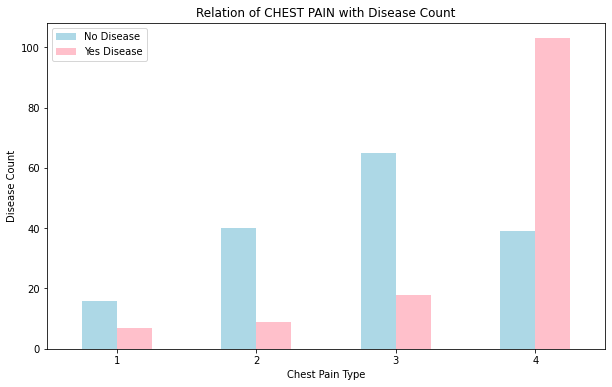

In [ ]:
# visualize heart Disease Frequency in chest pain
pd.crosstab(df1.cp, df1.Heart_disease_category).plot(kind="bar", figsize=(10,6), color=["lightblue", "pink"])
# Customization
plt.title("Relation of CHEST PAIN with Disease Count")
plt.xlabel("Chest Pain Type")
plt.ylabel("Disease Count")
plt.xticks(rotation=360)
plt.legend(["No Disease", "Yes Disease"])
plt.show()

Chest pain type 

Value 1: typical angina

Value 2: atypical angina

Value 3: non-anginal pain

Value 4: asymptomatic

Asymptomatic chest pain is more frequently showing heart disease


In [ ]:
# Categorize independent variable chol into three categories: 
# Normal: Less than 200 mg/dL. Borderline high: 200 to 239 mg/dL. High: At or above 240 mg/dL.
df1['chol_lable']=['Normal' if  chol<200 else 'Borderline high' if 200<=chol<=239 else 'High' for chol in list(df1['chol'].values) ]
print(df1['chol_lable'].value_counts())


High               155
Borderline high     94
Normal              48
Name: chol_lable, dtype: int64


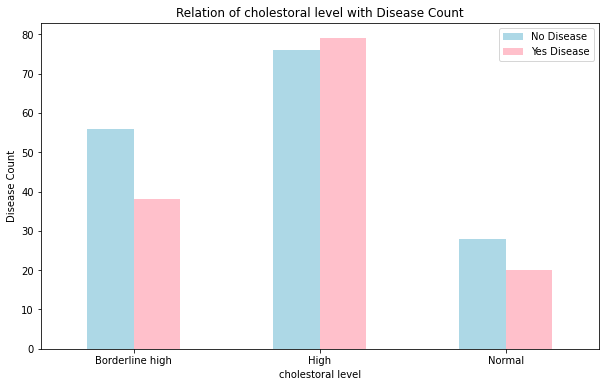

In [ ]:
# visualize heart Disease Frequency in cholestoral level
pd.crosstab(df1.chol_lable, df1.Heart_disease_category).plot(kind="bar", figsize=(10,6), color=["lightblue", "pink"])
# Customization
plt.title("Relation of cholestoral level with Disease Count")
plt.xlabel("cholestoral level")
plt.ylabel("Disease Count")
plt.xticks(rotation=360)
plt.legend(["No Disease", "Yes Disease"])
plt.show()

High cholestoral level people are more likely to have heart disease

In [ ]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_category,Age_lable,chol_lable
0,63,1,1,145,233,1,2,150,0,2,3,0,6,0,0,Old,Borderline high
1,67,1,4,160,286,0,2,108,1,1,2,3,3,2,1,Old,High
2,67,1,4,120,229,0,2,129,1,2,2,2,7,1,1,Old,Borderline high
3,37,1,3,130,250,0,0,187,0,3,3,0,3,0,0,Young,High
4,41,0,2,130,204,0,2,172,0,1,1,0,3,0,0,Young,Borderline high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0,2,0,7,1,1,Middle,High
298,45,1,1,110,264,0,0,132,0,1,2,0,7,1,1,Young,High
299,68,1,4,144,193,1,0,141,0,3,2,2,7,2,1,Old,Normal
300,57,1,4,130,131,0,0,115,1,1,2,1,7,3,1,Middle,Normal


In [ ]:
# Drop the lables and categories that created above
# Also drop the dependent variable num
df1_cleaned=df1.drop(columns = 'Heart_disease_category')
df1_cleaned=df1_cleaned.drop(columns = 'Age_lable')
df1_cleaned = df1_cleaned.drop(columns = 'chol_lable')
df1_cleaned = df1_cleaned.drop(columns = 'num')
df1_cleaned


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2,3,0,6
1,67,1,4,160,286,0,2,108,1,1,2,3,3
2,67,1,4,120,229,0,2,129,1,2,2,2,7
3,37,1,3,130,250,0,0,187,0,3,3,0,3
4,41,0,2,130,204,0,2,172,0,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0,2,0,7
298,45,1,1,110,264,0,0,132,0,1,2,0,7
299,68,1,4,144,193,1,0,141,0,3,2,2,7
300,57,1,4,130,131,0,0,115,1,1,2,1,7


### Dimension Reduction

We decided not to use dimension reduction because with only 300 rows, the data set is very small, and we wanted to keep all the features included. Since dimension reduction is also known for causing data loss, we thought it would be best to skip it.

### Variable Selection

For logistic regression, we decided to not use variable selection since we had good accuracy.

### Regularization

For the Decision Tree model, we initially left all parameters to their default values, but the model performed poorly due to overfitting. Then we tried setting min_samples_leaf, min_samples_split, and max_depth to 7 and got a better fit.

## Machine Learning Algorithm Exploration

Because we are creating a model for classification, we decided on using Logistic Regression, Random Forest, SVM, KNN, and Decision Tree models.

In [ ]:
# assign x as independent variables, and y as dependent variable Heart_disease_category
x = df1_cleaned
y = df1['Heart_disease_category']
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2,3,0,6
1,67,1,4,160,286,0,2,108,1,1,2,3,3
2,67,1,4,120,229,0,2,129,1,2,2,2,7
3,37,1,3,130,250,0,0,187,0,3,3,0,3
4,41,0,2,130,204,0,2,172,0,1,1,0,3


In [ ]:
# print head of y
pd.DataFrame(y).head()

,Heart_disease_category
0,0
1,1
2,1
3,0
4,0


In [ ]:
#split data into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
x_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,54.721519,0.670886,3.135021,131.299578,248.464135,0.147679,0.953586,149.518987,0.333333,0.746835,1.582278,0.683544,4.713080
std,9.372160,0.470886,0.955979,17.522592,52.600950,0.355533,0.992535,22.754136,0.472402,0.980337,0.602416,0.932615,1.938121
min,29.000000,0.000000,1.000000,94.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,212.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,0.000000,153.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,62.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.000000,1.000000,1.000000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.000000,3.000000,3.000000,7.000000


In [ ]:
# print y train
y_train.head()

170    1
109    1
95     1
140    0
81     0
Name: Heart_disease_category, dtype: int64

### Logistic Regression

In [ ]:
logModel= LogisticRegression()
logModel.fit(x_train, y_train)
ypred_test_logModel = logModel.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- Type_1 Error: 3 were diagnosed positive when they were not having the disease.
- Type_2 Error: 8 were diagnosed negative when they actually having the disease.

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randFModel = RandomForestClassifier(n_estimators=10, random_state=10)
randFModel.fit(x_train, y_train)
ypred_test_randFModel = randFModel.predict(x_test)

### SVM

In [ ]:
from sklearn.svm import SVC
svmModel = SVC(gamma = 'scale', C = 5, random_state=4)
svmModel.fit(x_train, y_train)
ypred_test_svmModel = svmModel.predict(x_test)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=10)
knnModel.fit(x_train, y_train)
ypred_test_knnModel = knnModel.predict(x_test)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtModel = DecisionTreeClassifier(criterion = 'entropy',random_state=10,max_depth = 7, min_samples_leaf = 7, min_samples_split = 7)
dtModel.fit(x_train, y_train)
ypred_test_dtModel = dtModel.predict(x_test)

## In-Sample Validation

In order to test model performance, we first find the accuracy score for each model, then generate a classification report to find more specific scores like precision, recall, F-1, and support.
We will also create confusion matrices for each model to test the accuracy of True Positives and True Negatives. 

#### Performance of Logistic Regression

Text(33.0, 0.5, 'Condition')

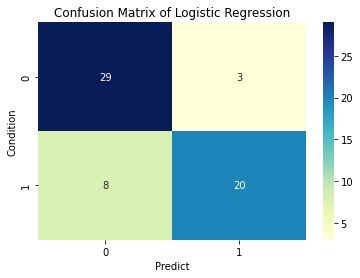

In [ ]:
#heatmap of confuciton matrix
ax = sns.heatmap(confusion_matrix(y_test,ypred_test_logModel), annot=True, fmt="d",cmap="YlGnBu")
ax.set_title('Confusion Matrix of Logistic Regression')
ax.set_xlabel('Predict')
ax.set_ylabel('Condition')

- Type_1 Error: 3 were diagnosed positive when they were not having the disease.
- Type_2 Error: 8 were diagnosed negative when they actually having the disease.

In [ ]:
# Logistic accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
logistic_accuracy = accuracy_score(y_test, ypred_test_logModel)
print("Logistic accuracy is: %0.3f" %(logistic_accuracy))
print('****************************************')
print(classification_report(y_test, ypred_test_logModel))

Logistic accuracy is: 0.817
****************************************
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        32
           1       0.87      0.71      0.78        28

    accuracy                           0.82        60
   macro avg       0.83      0.81      0.81        60
weighted avg       0.82      0.82      0.81        60



#### Performance of Random Forest

In [ ]:
# Random forest accuracy
randFModel_accuracy = accuracy_score(y_test, ypred_test_randFModel)
print("Random forest accuracy is: %0.3f" %(randFModel_accuracy))
print('****************************************')
print(classification_report(y_test, ypred_test_randFModel))


Random forest accuracy is: 0.750
****************************************
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        32
           1       0.78      0.64      0.71        28

    accuracy                           0.75        60
   macro avg       0.76      0.74      0.74        60
weighted avg       0.75      0.75      0.75        60



Text(33.0, 0.5, 'Condition')

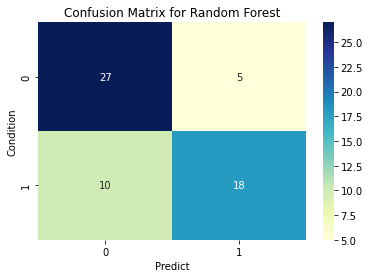

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test,ypred_test_randFModel), annot=True, fmt="d",cmap="YlGnBu")
ax.set_title('Confusion Matrix for Random Forest')
ax.set_xlabel('Predict')
ax.set_ylabel('Condition')

#### Performance of SVM

In [ ]:
# SVM accuracy
svmModel_accuracy = accuracy_score(y_test, ypred_test_svmModel)
print("SVM accuracy is: %0.3f" %(svmModel_accuracy))
print('****************************************')
print(classification_report(y_test, ypred_test_svmModel))

SVM accuracy is: 0.750
****************************************
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        32
           1       0.78      0.64      0.71        28

    accuracy                           0.75        60
   macro avg       0.76      0.74      0.74        60
weighted avg       0.75      0.75      0.75        60



Text(33.0, 0.5, 'Condition')

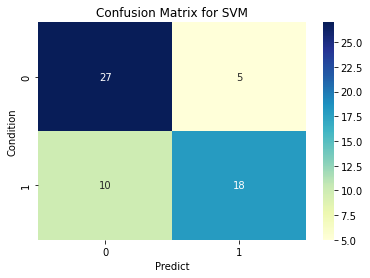

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test,ypred_test_svmModel), annot=True, fmt="d",cmap="YlGnBu")
ax.set_title('Confusion Matrix for SVM')
ax.set_xlabel('Predict')
ax.set_ylabel('Condition')

#### Performance of KNN

In [ ]:
# KNN accuracy
knnModel_accuracy = accuracy_score(y_test, ypred_test_knnModel)
print("KNN accuracy is: %0.3f" %(knnModel_accuracy))
print('****************************************')
print(classification_report(y_test, ypred_test_knnModel))

KNN accuracy is: 0.667
****************************************
              precision    recall  f1-score   support

           0       0.66      0.78      0.71        32
           1       0.68      0.54      0.60        28

    accuracy                           0.67        60
   macro avg       0.67      0.66      0.66        60
weighted avg       0.67      0.67      0.66        60



Text(33.0, 0.5, 'Condition')

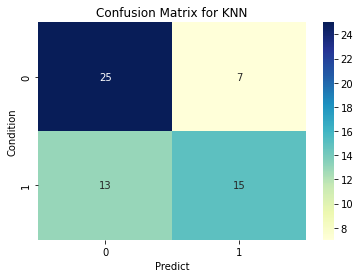

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test,ypred_test_knnModel), annot=True, fmt="d",cmap="YlGnBu")
ax.set_title('Confusion Matrix for KNN')
ax.set_xlabel('Predict')
ax.set_ylabel('Condition')

#### Performance of Decision Tree

In [ ]:
# DT accuracy
dtModel_accuracy = accuracy_score(y_test, ypred_test_dtModel)
print("Decision Tree accuracy is: %0.3f" %(dtModel_accuracy))
print('****************************************')
print(classification_report(y_test, ypred_test_dtModel))

Decision Tree accuracy is: 0.817
****************************************
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.81      0.79      0.80        28

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60



Text(33.0, 0.5, 'Condition')

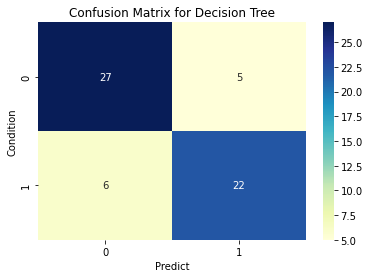

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test,ypred_test_dtModel), annot=True, fmt="d",cmap="YlGnBu")
ax.set_title('Confusion Matrix for Decision Tree')
ax.set_xlabel('Predict')
ax.set_ylabel('Condition')

#### Individual Model Performance

In [ ]:
multi_comp = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','Support Vector Machine',
                    'K-Nearest Neighbour','Decision Tree'], 'Accuracy': [logistic_accuracy*100,
                    randFModel_accuracy*100,svmModel_accuracy*100,knnModel_accuracy*100,dtModel_accuracy*100]})
multi_comp


,Model,Accuracy
0,Logistic Regression,81.666667
1,Random Forest,75.000000
2,Support Vector Machine,75.000000
3,K-Nearest Neighbour,66.666667
4,Decision Tree,81.666667


The logistic regression model performed best.

## Ensemble Learning

Our chosen ensemble technique is Hard Voting, which we did by using EnsembleVoteClassifier.

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

**Mix different models**

In [ ]:
# mix SVM model, KNN model, and DT model weight as 2,2,6
from mlxtend.classifier import EnsembleVoteClassifier
mix1= EnsembleVoteClassifier(clfs=[svmModel,knnModel,dtModel],weights=[2,2,6])
mix1.fit(x_train,y_train)
ypred_test_mix1 = mix1.predict(x_test)

In [ ]:
# mixed model accuracy
mix1_accuracy = accuracy_score(y_test, ypred_test_mix1)
print("Mixed model accuracy is: %0.3f" %(mix1_accuracy))
print('****************************************')
print(classification_report(y_test, ypred_test_mix1))

Mixed model accuracy is: 0.817
****************************************
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.81      0.79      0.80        28

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60



Text(33.0, 0.5, 'Condition')

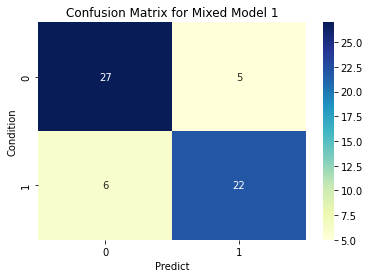

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test,ypred_test_mix1), annot=True, fmt="d",cmap="YlGnBu")
ax.set_title('Confusion Matrix for Mixed Model 1')
ax.set_xlabel('Predict')
ax.set_ylabel('Condition')

In [ ]:
# compare individual models with mixed model1
multi_comp = pd.DataFrame({'Model': ['Support Vector Machine','K-Nearest Neighbour','Decision Tree','mix1'], 'Accuracy': [svmModel_accuracy*100,knnModel_accuracy*100,dtModel_accuracy*100, mix1_accuracy*100]})
multi_comp


,Model,Accuracy
0,Support Vector Machine,75.000000
1,K-Nearest Neighbour,66.666667
2,Decision Tree,81.666667
3,mix1,81.666667


Mixed model perform better than individual model SVM and KNN, and same performance as Decision Tree model.

In [ ]:
# mix Random forest model, SVM model, KNN model, and Decision Tree model, weight as 3,1,1,5
mix2= EnsembleVoteClassifier(clfs=[randFModel, svmModel,knnModel,dtModel],weights=[3,1,1,5])
mix2.fit(x_train,y_train)
ypred_test_mix2 = mix2.predict(x_test)

In [ ]:
# mixed model accuracy
mix2_accuracy = accuracy_score(y_test, ypred_test_mix2)
print("Mixed model2 accuracy is: %0.3f" %(mix2_accuracy))
print('****************************************')
print(classification_report(y_test, ypred_test_mix2))

Mixed model2 accuracy is: 0.833
****************************************
              precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       0.88      0.75      0.81        28

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



Text(33.0, 0.5, 'Condition')

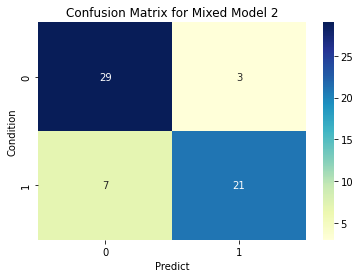

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test,ypred_test_mix2), annot=True, fmt="d",cmap="YlGnBu")
ax.set_title('Confusion Matrix for Mixed Model 2')
ax.set_xlabel('Predict')
ax.set_ylabel('Condition')

In [ ]:
# compare individual models with mixed model2
multi_comp = pd.DataFrame({'Model': ['Random forest','SVM', 'KNN', 'Decision Tree','mix2'], 'Accuracy': [randFModel_accuracy*100, svmModel_accuracy*100, knnModel_accuracy*100, dtModel_accuracy*100, mix2_accuracy*100]})
multi_comp

,Model,Accuracy
0,Random forest,75.000000
1,SVM,75.000000
2,KNN,66.666667
3,Decision Tree,81.666667
4,mix2,83.333333


Mixed model performed slightly better than individual models.


In [ ]:
# mix Random forest model, SVM model, KNN model, and Decision Tree model, weight as 3,1,1,5
mix3= EnsembleVoteClassifier(clfs=[randFModel,dtModel,logModel],weights=[0,3,7])
mix3.fit(x_train,y_train)
ypred_test_mix3 = mix3.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# mixed model accuracy
mix3_accuracy = accuracy_score(y_test, ypred_test_mix3)
print("Mixed model3 accuracy is: %0.3f" %(mix3_accuracy))
print('****************************************')
print(classification_report(y_test, ypred_test_mix3))

Mixed model3 accuracy is: 0.817
****************************************
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        32
           1       0.87      0.71      0.78        28

    accuracy                           0.82        60
   macro avg       0.83      0.81      0.81        60
weighted avg       0.82      0.82      0.81        60



Text(33.0, 0.5, 'Condition')

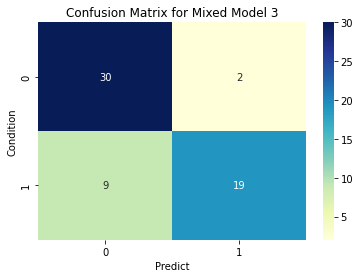

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test,ypred_test_mix3), annot=True, fmt="d",cmap="YlGnBu")
ax.set_title('Confusion Matrix for Mixed Model 3')
ax.set_xlabel('Predict')
ax.set_ylabel('Condition')

In [ ]:
# compare individual models with mixed model2
multi_comp = pd.DataFrame({'Model': ['Random forest','SVM', 'KNN', 'Decision Tree','mix2','mix3'], 'Accuracy': [randFModel_accuracy*100, svmModel_accuracy*100, knnModel_accuracy*100, dtModel_accuracy*100, mix2_accuracy*100, mix3_accuracy*100]})
multi_comp

,Model,Accuracy
0,Random forest,75.000000
1,SVM,75.000000
2,KNN,66.666667
3,Decision Tree,81.666667
4,mix2,83.333333
5,mix3,81.666667


## Conclusion

After evaluating the performance of all models testing, including individual models and Ensemble models, we found that the mix2 model (Random Forest, SVM, KNN, and Decision Tree) and mix3 (Random Forest, SVM, Decision Tree, Logistic Regression) models performed the best at 83.3% accuracy. The next highest models, which were Decision Tree, Logistic Regression, and the mix1 model (SVM, KNN, Decision Tree) all tied at 81.67%. Since we only used Hard Voting as our ensemble technique, that is what was used to create the most accurate model.